In [1]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

import os
from models.CNNs import CNNs
from datasets.SPCUP22MelDataModule import SPCUP22MelDataModule
import numpy as np

from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores,
    plot_tsne_features
)

### Change this according to your system

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "6,7"

### Without augmented data

In [3]:
hparams = {
    "network": "VGG16",
    "return_features": True,
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("vgg16_on_train_dataset","last.ckpt")),
    **hparams,
)
data_module = SPCUP22MelDataModule(
        64,
        dataset_root=pathlib.Path(ROOT.joinpath("data","mel_feature","spcup22")).absolute(),
        config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
        should_include_augmented_data=False,
        num_workers=8,
    )

### Predictions on test set

In [4]:
actual_labels, predictions, probabilities, _, final_layer_features = make_predictions(
    checkpoint, data_module, return_final_layer_features=True,
)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part2_mel_features.zip]...


/home/rafatmating/anaconda3/envs/spcup/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1584: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

/home/rafatmating/SPCUP2022/utils/metrics.py:177: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [5]:
print_scores(actual_labels, predictions)


    F1 Score: 0.70
    Accuracy: 0.70
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

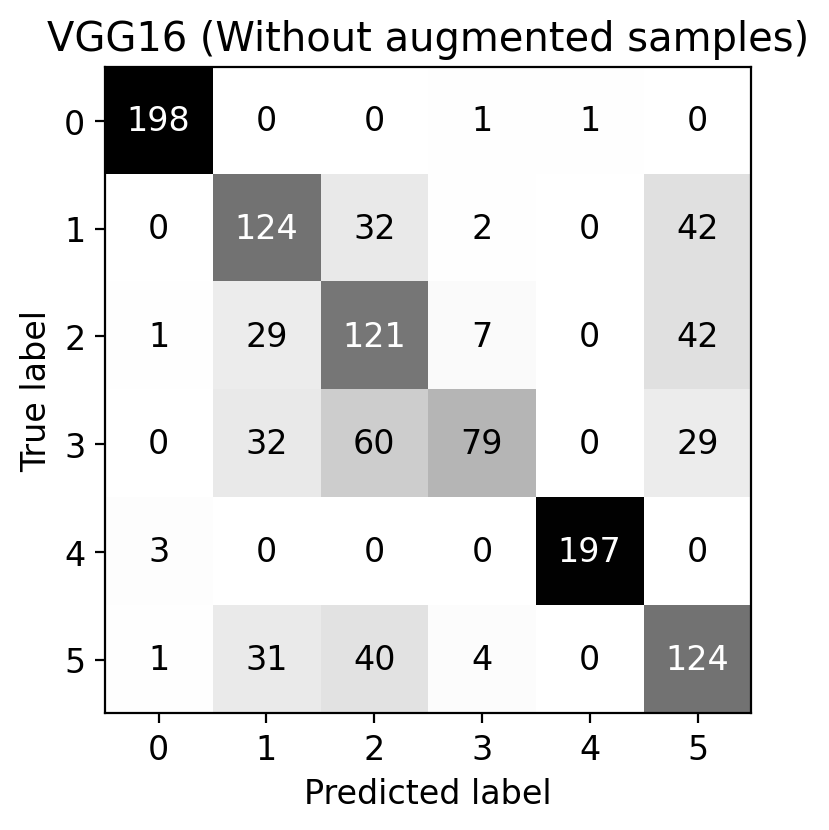

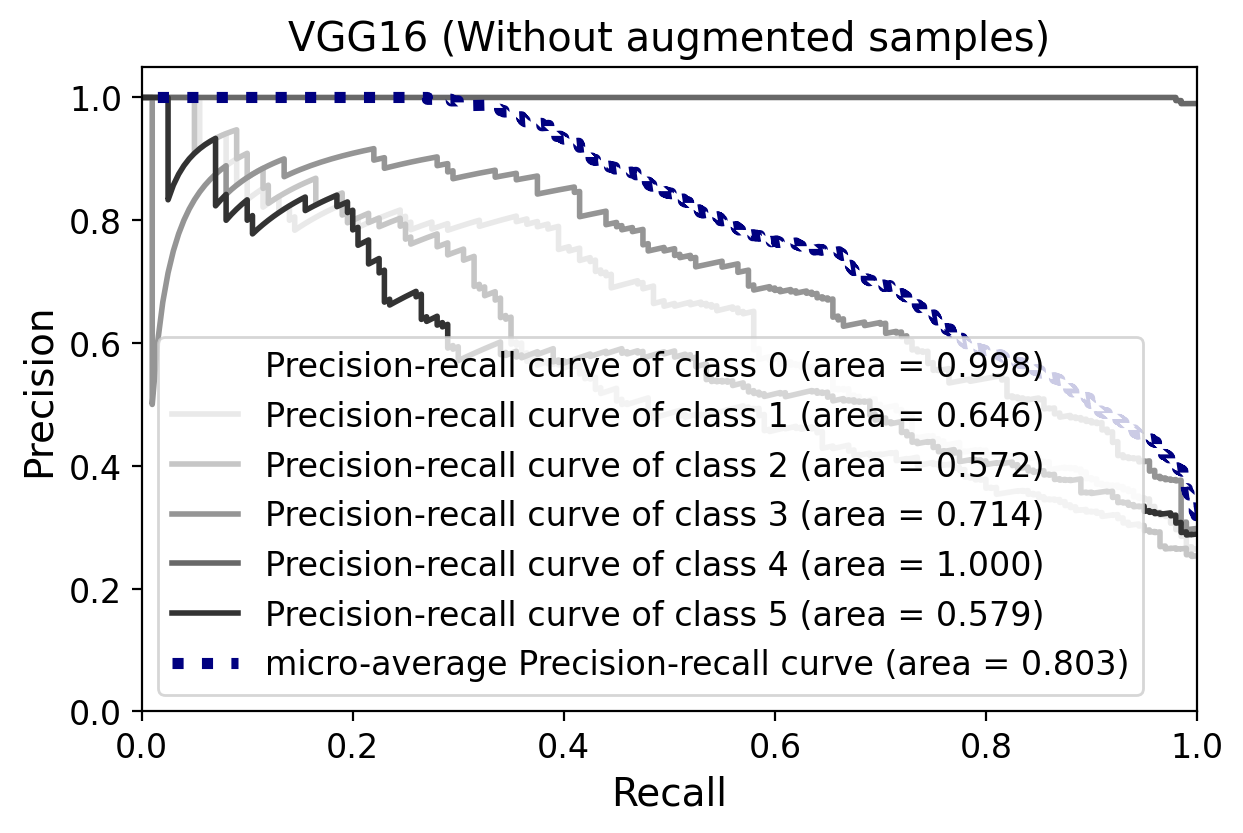

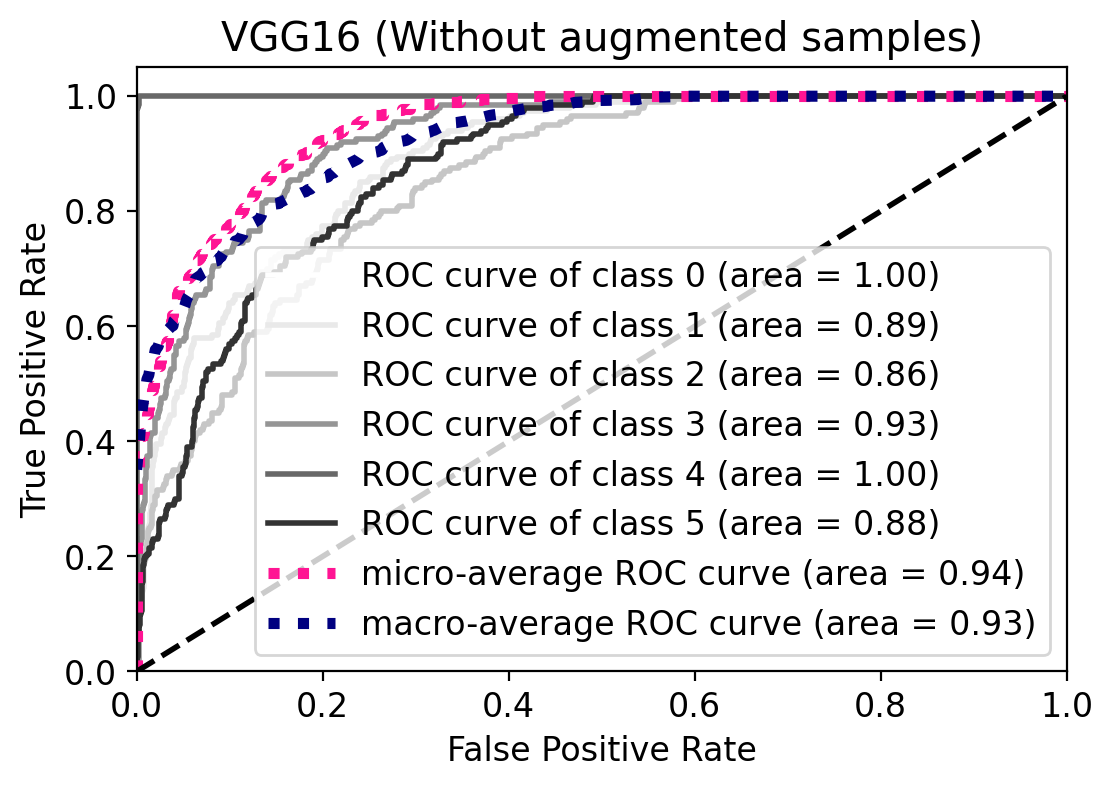

In [6]:
fig_save_path = str(ROOT.joinpath("results", "vgg16", "without_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="VGG16 (Without augmented samples)",
    save_path=fig_save_path
)

<Figure size 432x288 with 0 Axes>

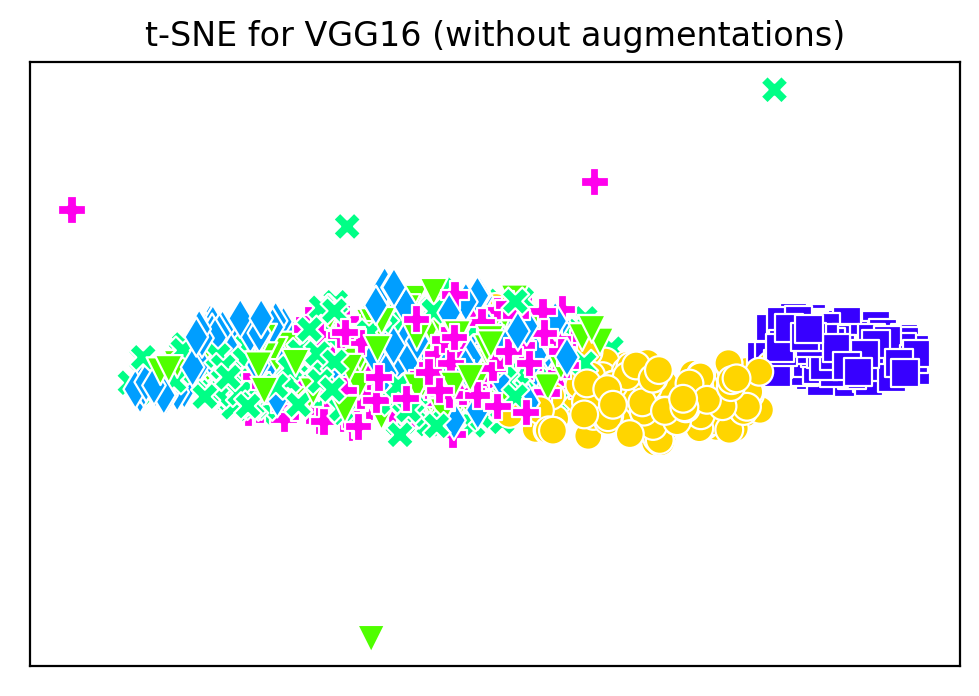

In [7]:
final_layer_features = np.array(final_layer_features, dtype=np.float32)

fig, ax = plot_tsne_features(
    final_layer_features,
    actual_labels,
    "t-SNE for VGG16 (without augmentations)",
)

fig.savefig(
    ROOT.joinpath("results", "vgg16_no_aug.eps"),
    format="eps",
    bbox_inches="tight",
)

### With augmented data

In [8]:
hparams = {
    "network": "VGG16",
    "return_features": True,
}

checkpoint = CNNs.load_from_checkpoint(
    str(ROOT.joinpath("vgg16_on_train_dataset_augmented","last.ckpt")),
    **hparams,
)
data_module = SPCUP22MelDataModule(
        64,
        dataset_root=pathlib.Path(ROOT.joinpath("data","mel_feature","spcup22")).absolute(),
        config_file_path=str(ROOT.joinpath("config","mel_feature.yaml")),
        should_include_augmented_data=True,
        num_workers=8,
    )

In [9]:
actual_labels, predictions, probabilities, _, final_layer_features = make_predictions(
    checkpoint, data_module, return_final_layer_features=True,
)

GPU available: True, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_training.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_train_augmented.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part1_mel_features.zip]...
Skipping downloading [/home/rafatmating/SPCUP2022/data/mel_feature/spcup22/spcup_2022_eval_part2_mel_features.zip]...


/home/rafatmating/anaconda3/envs/spcup/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1584: UserWarning: GPU available but not used. Set the gpus flag in your trainer `Trainer(gpus=1)` or script `--gpus=1`.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

/home/rafatmating/SPCUP2022/utils/metrics.py:177: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [10]:
print_scores(actual_labels, predictions)


    F1 Score: 0.68
    Accuracy: 0.68
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

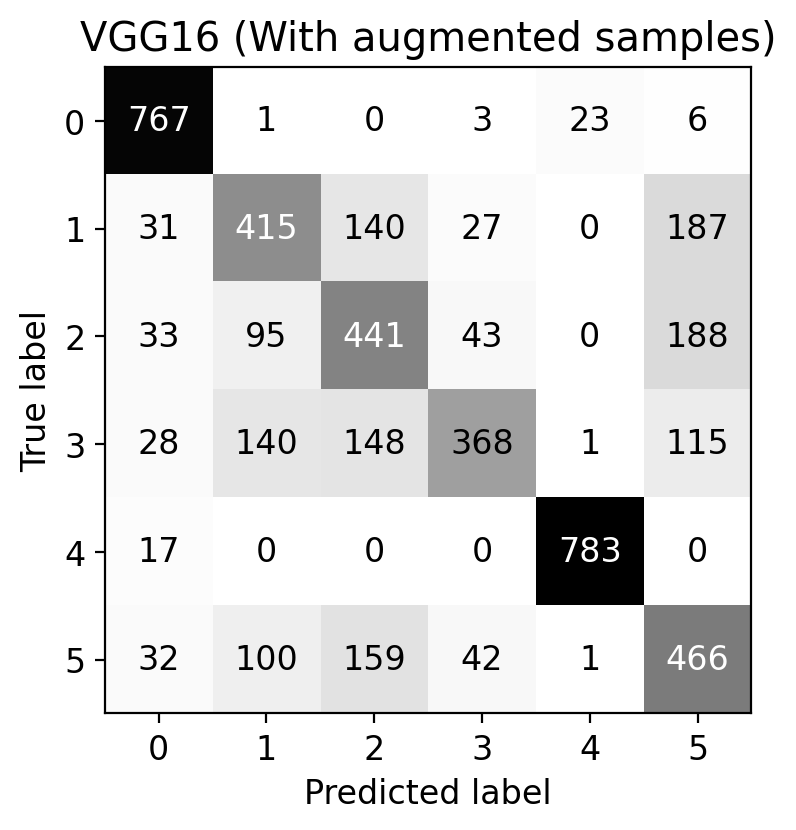

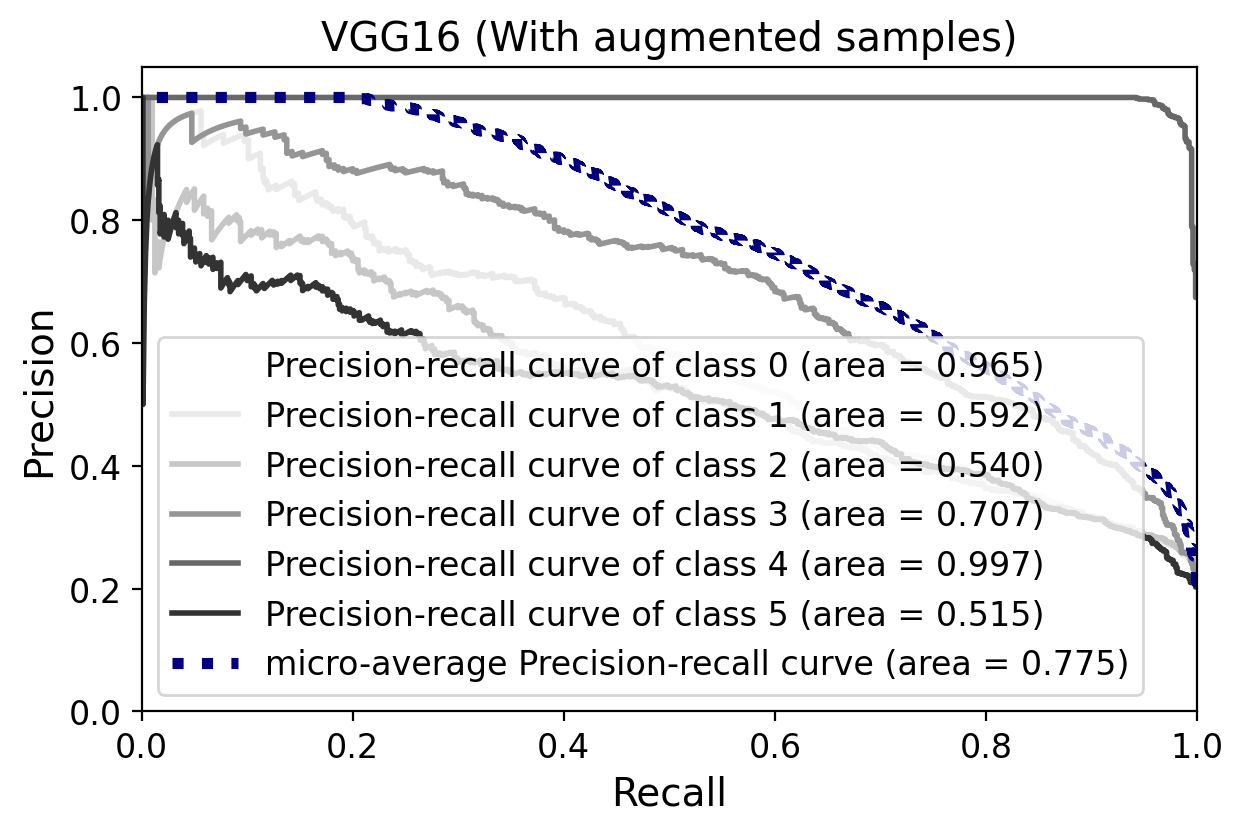

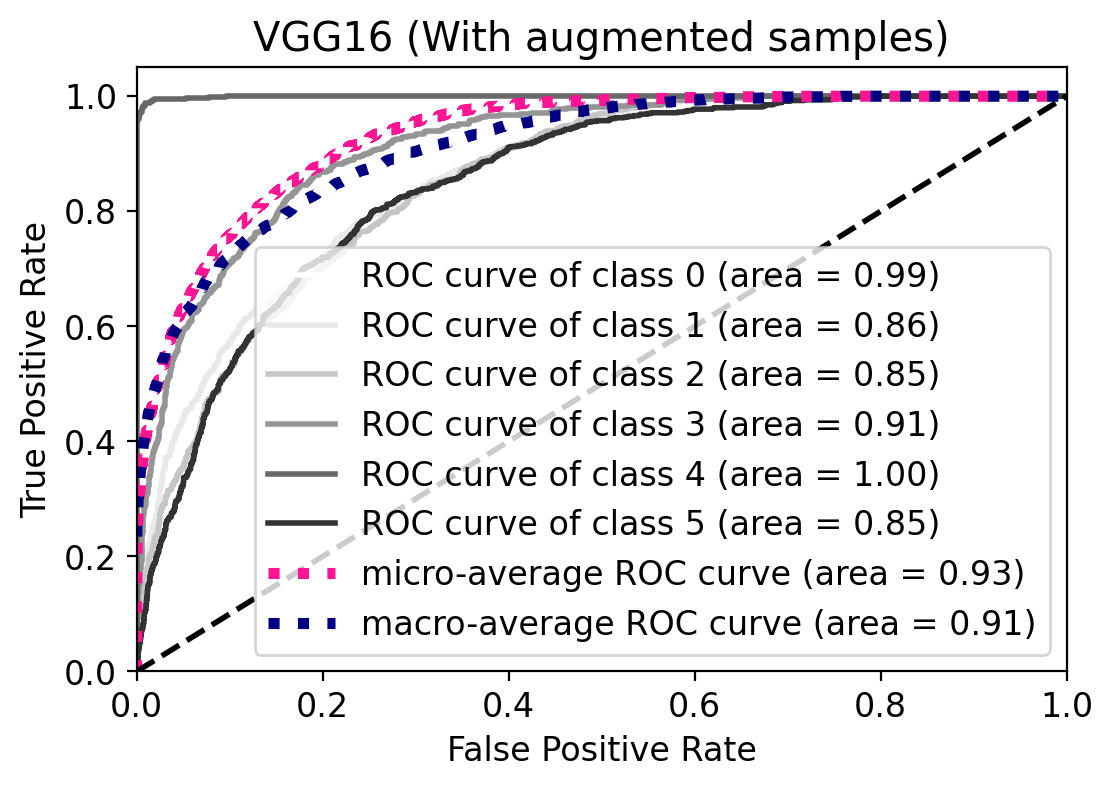

In [11]:
fig_save_path = str(ROOT.joinpath("results", "vgg16", "with_augmented"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="VGG16 (With augmented samples)",
    save_path=fig_save_path
)

<Figure size 432x288 with 0 Axes>

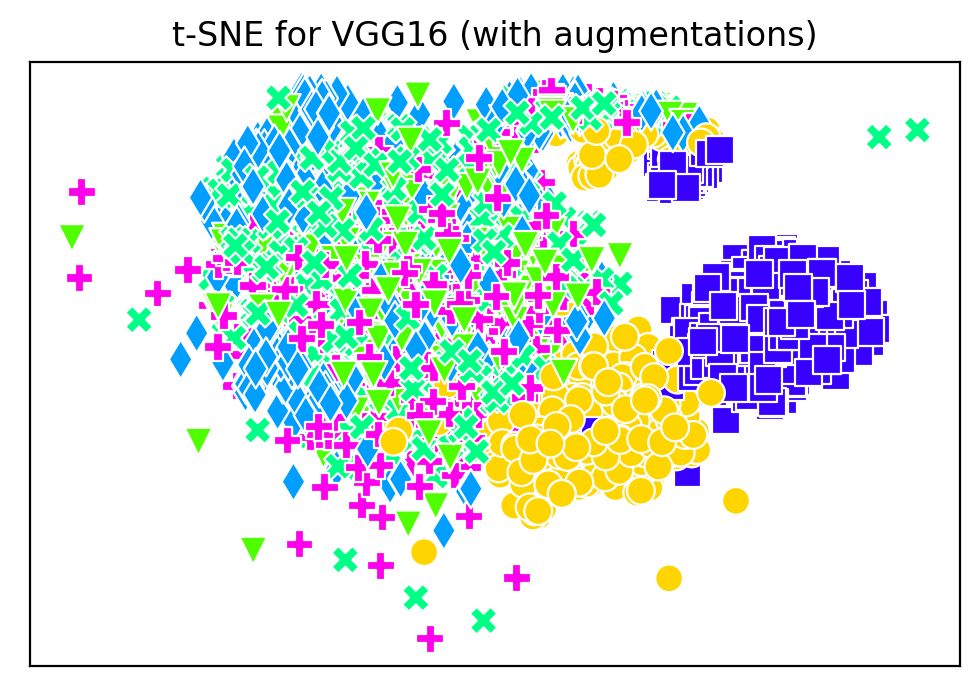

In [13]:
final_layer_features = np.array(final_layer_features, dtype=np.float32)

fig, ax = plot_tsne_features(
    final_layer_features,
    actual_labels,
    "t-SNE for VGG16 (with augmentations)",
)

fig.savefig(
    ROOT.joinpath("results", "vgg16_aug.eps"),
    format="eps",
    bbox_inches="tight",
)